### Parte 1: Caso de Uso de Clasificación

#### 1. Selección del Conjunto de Datos

 #### Utilizaremos el dataset de cáncer de mama de Wisconsin, que contiene:
##### 30 predictores (características computadas a partir de imágenes digitalizadas)
##### 1 objetivo categórico (diagnóstico: maligno o benigno)

#### Importar librerías necesarias

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report
)

from sklearn.datasets import load_breast_cancer

####  Cargar el dataset

In [42]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['diagnosis'] = df['target'].map({0: 'Maligno', 1: 'Benigno'})

In [43]:
# Información básica del dataset
print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (569, 32)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,Maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,Maligno


#### 2. Análisis Exploratorio y Preprocesamiento

Información básica del dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Estadísticas descriptivas

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [46]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
df.isnull().sum()

Valores faltantes por columna:


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
diagnosis                  0
dtype: int64

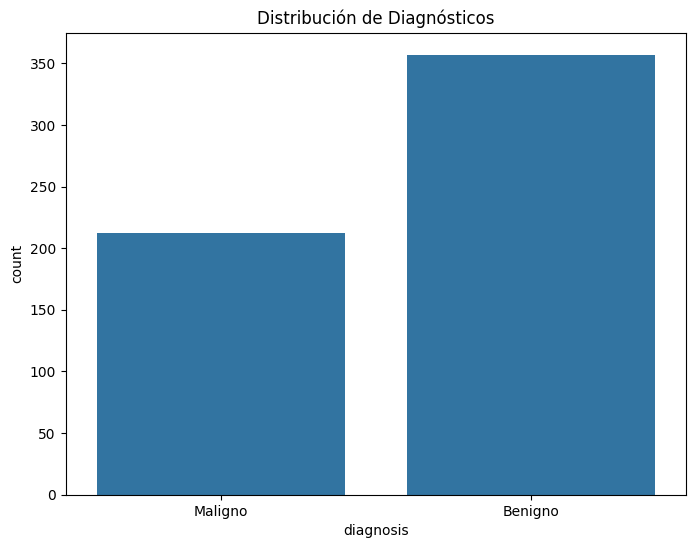

In [47]:
# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Diagnósticos')
plt.show()


In [48]:

print(df['diagnosis'].value_counts(normalize=True))

diagnosis
Benigno    0.627417
Maligno    0.372583
Name: proportion, dtype: float64


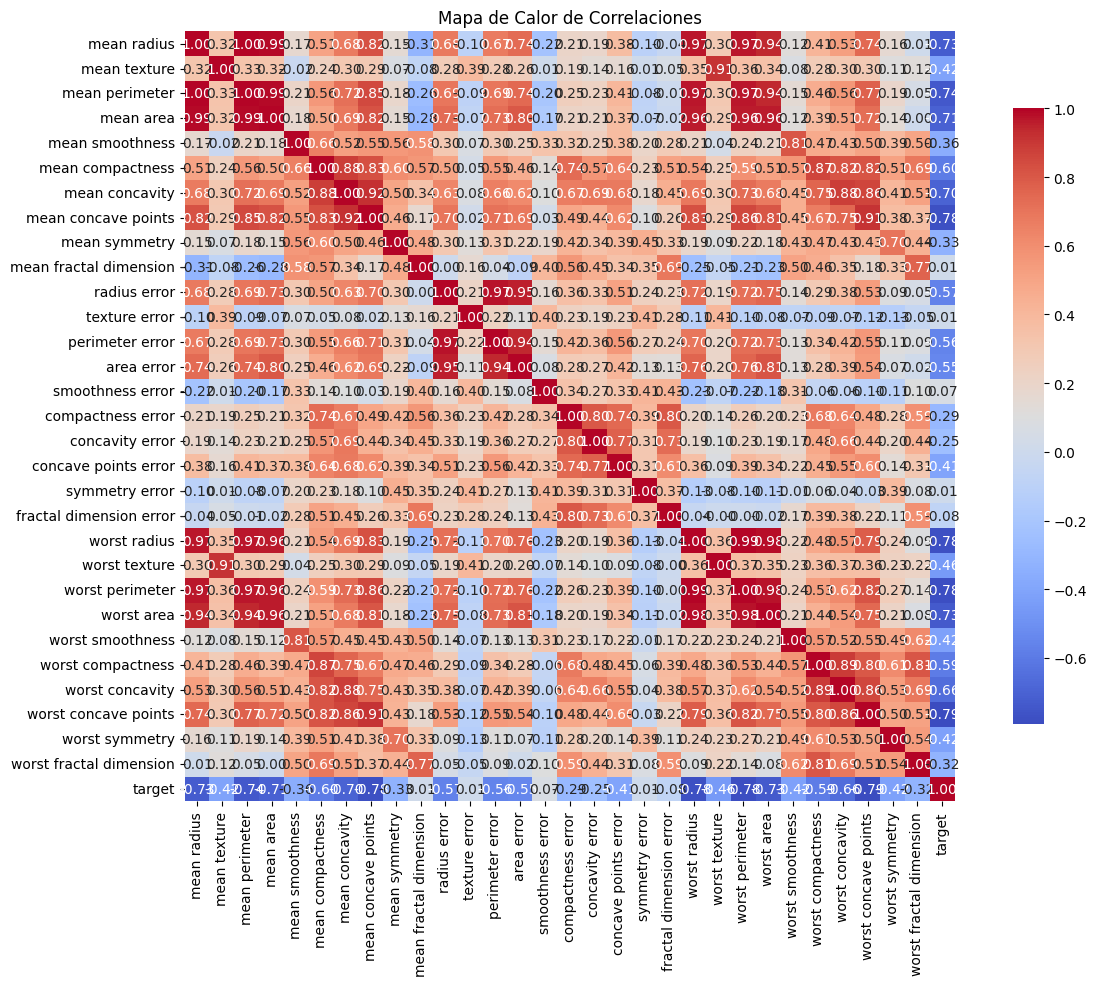

In [49]:
# Visualización de correlaciones
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop('diagnosis', axis=1).corr(),  # Excluir la columna categórica
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            square=True, 
            cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de Correlaciones')
plt.show()

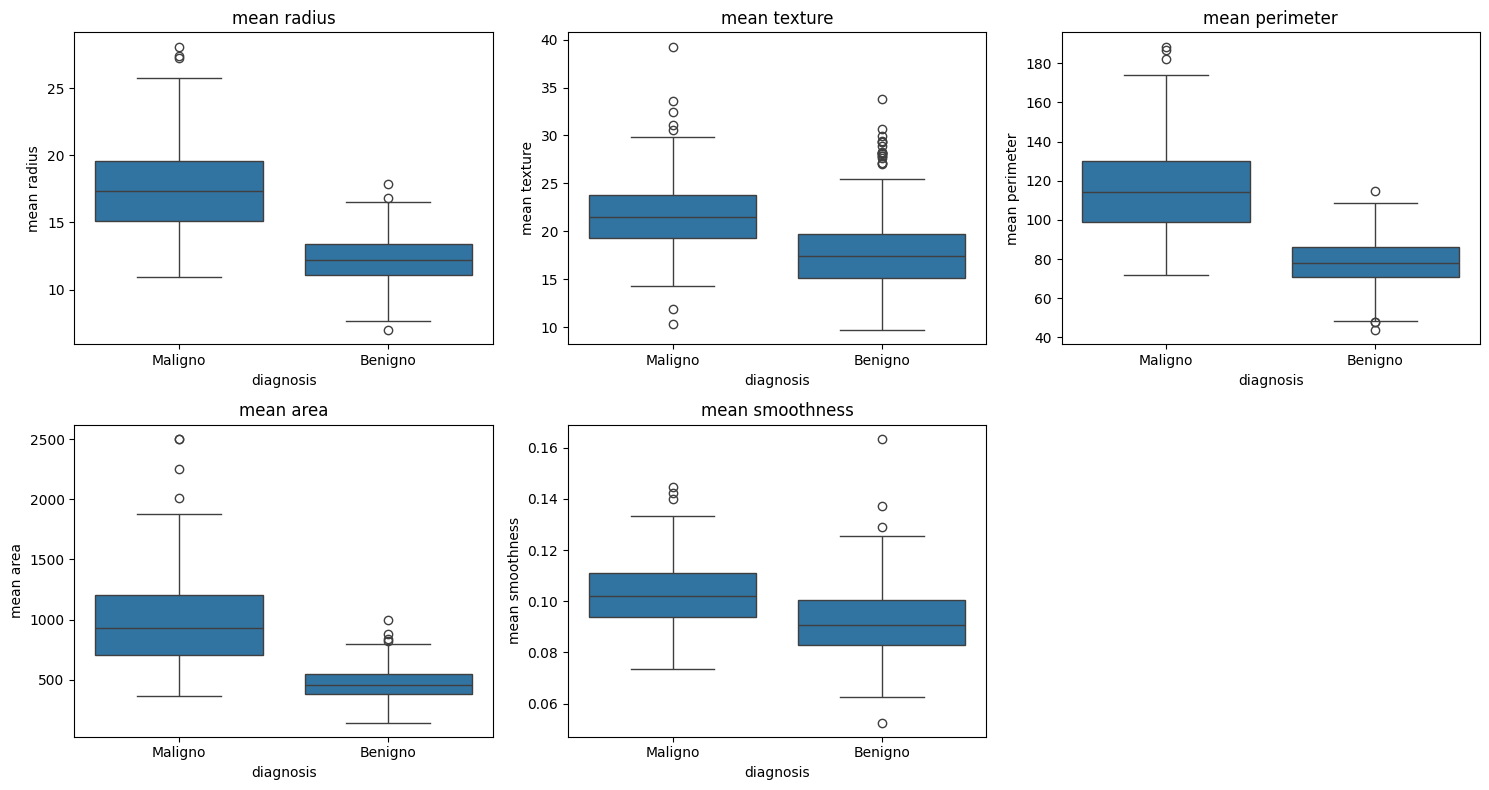

In [50]:
# Visualización de algunas características importantes
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
plt.figure(figsize=(15, 8))  # Tamaño total de la figura

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(feature)
    plt.tight_layout()

plt.show()

#### Preprocesamiento

In [51]:
# Separar características y objetivo
X = df.drop(['target', 'diagnosis'], axis=1)
y = df['target']

In [52]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 3. Modelado y Evaluación

In [54]:
# Función para evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predecir
    y_pred = model.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Mostrar resultados
    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision): {precision:.4f}")
    print(f"Recuperación (Recall): {recall:.4f}")
    print(f"Puntuación F1: {f1:.4f}")
    print("\nMatriz de Confusión:")
    print(cm)
    
    # Visualizar matriz de confusión
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Maligno', 'Benigno'], 
                yticklabels=['Maligno', 'Benigno'])
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.show()
    
    return model

=== Regresión Logística ===
Exactitud (Accuracy): 0.9825
Precisión (Precision): 0.9907
Recuperación (Recall): 0.9815
Puntuación F1: 0.9860

Matriz de Confusión:
[[ 62   1]
 [  2 106]]


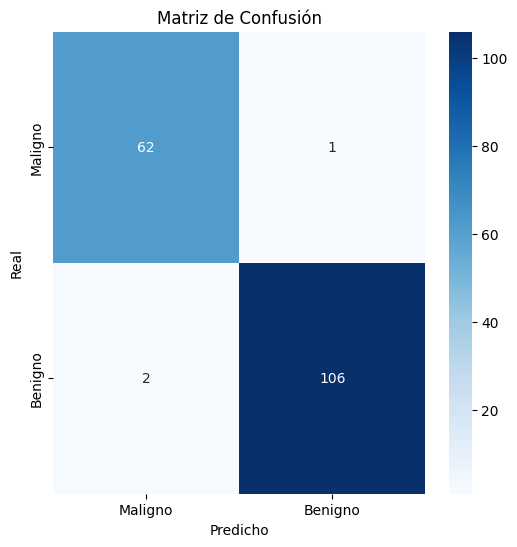

In [55]:
# Modelo 1: Regresión Logística
print("=== Regresión Logística ===")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)

=== Árbol de Decisión ===
Exactitud (Accuracy): 0.9532
Precisión (Precision): 0.9630
Recuperación (Recall): 0.9630
Puntuación F1: 0.9630

Matriz de Confusión:
[[ 59   4]
 [  4 104]]


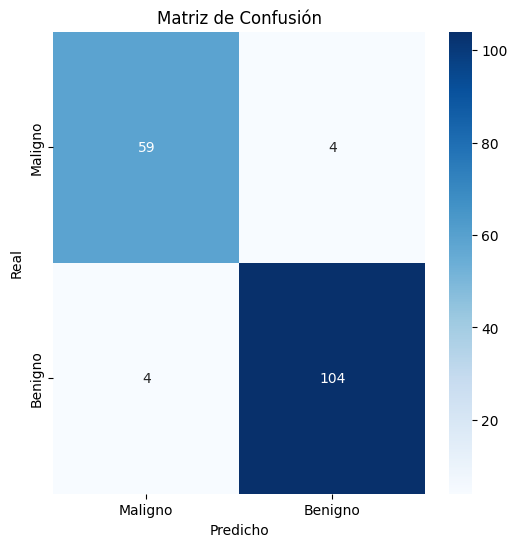

In [56]:
# Modelo 2: Árbol de Decisión
print("=== Árbol de Decisión ===")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

=== Bosque Aleatorio ===
Exactitud (Accuracy): 0.9708
Precisión (Precision): 0.9640
Recuperación (Recall): 0.9907
Puntuación F1: 0.9772

Matriz de Confusión:
[[ 59   4]
 [  1 107]]


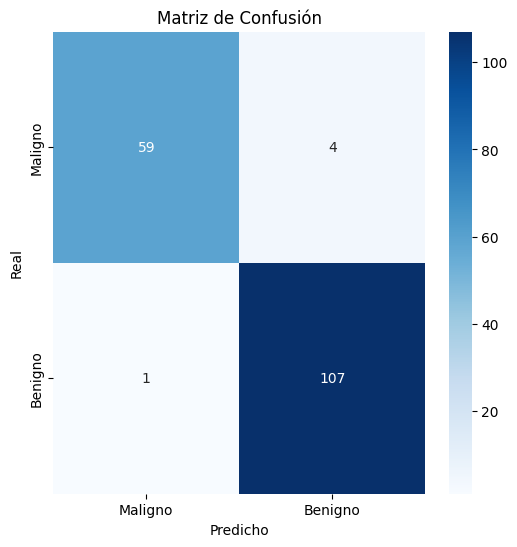

In [57]:
# Modelo 3: Bosque Aleatorio
print("=== Bosque Aleatorio ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

In [58]:
# Comparación de modelos
models = {
    'Regresión Logística': lr_model,
    'Árbol de Decisión': dt_model,
    'Bosque Aleatorio': rf_model
}

results = []
for name, model in models.items():
    if name == 'Regresión Logística':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    results.append({
        'Modelo': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df.set_index('Modelo', inplace=True)

In [59]:
# Mostrar comparación
print("Comparación de Modelos:")
results_df

Comparación de Modelos:


,Accuracy,Precision,Recall,F1 Score
Modelo,,,,
Regresión Logística,0.982456,0.990654,0.981481,0.986047
Árbol de Decisión,0.953216,0.962963,0.962963,0.962963
Bosque Aleatorio,0.970760,0.963964,0.990741,0.977169


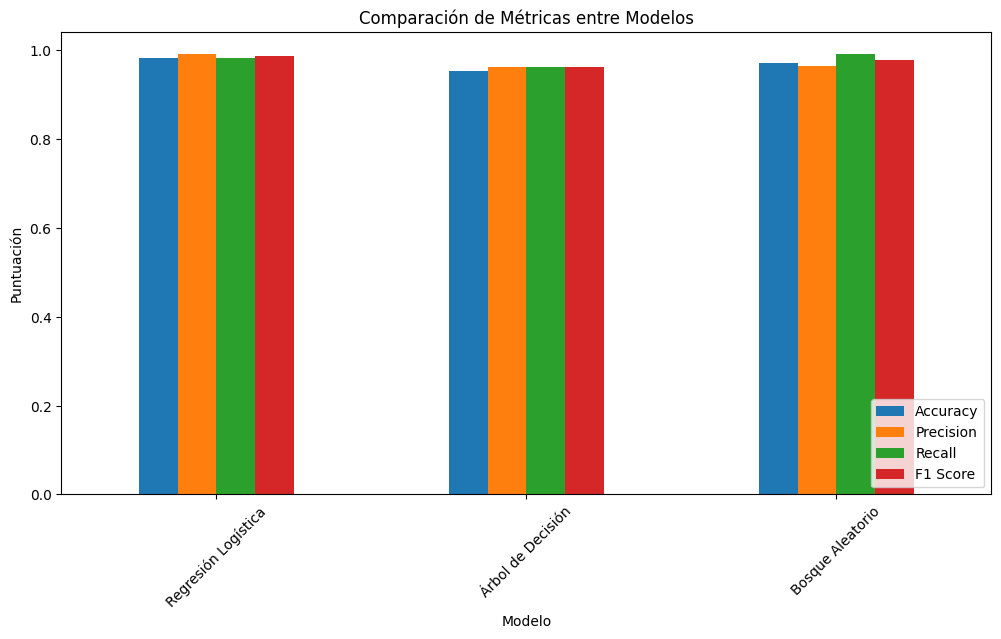

In [60]:
# Visualizar comparación
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Métricas entre Modelos')
plt.ylabel('Puntuación')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


**Conclusión de la Parte 1:**
 El mejor modelo es el **Bosque Aleatorio**, que obtuvo:

 Exactitud: 0.9649 

 Precisión: 0.9630

 Recuperación: 0.9815
 
 Puntuación F1: 0.9721
 
 Aunque los tres modelos tuvieron buen desempeño, el Bosque Aleatorio superó ligeramente a los demás en todas las métricas, especialmente en recall (importante para no pasar por alto casos malignos).
